In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from config_file import *
%reload_ext autoreload
%autoreload 2

### Part 1: Surfer features and movement analyze

In [93]:
#Load datasets and remove NaN columns
smartwatch_dataset = pd.read_csv('Data//Garmin Smart watch placed on the rist//max_speed_garmin_clock.csv')
smartwatch_dataset.dropna(axis=1, how='all')

config = Config()
paths = config.all_paths_list()
location_datasets = []
for i, path in enumerate(paths):
    location_datasets.append(pd.read_csv(path))
    location_datasets[i].dropna(axis=1, how='all')
    config.calc_all_heel_segment(location_datasets[i])

# Starting with first dataframe, Should include all
print(location_datasets[0])
print(smartwatch_dataset)

                          time               servertime   latitude  longitude  \
0      2023-03-07 07:52:56.599  2023-03-07 07:52:56.822  29.541469  34.948042   
1      2023-03-07 07:52:57.599  2023-03-07 07:52:57.792  29.541472  34.948040   
2      2023-03-07 07:52:58.599  2023-03-07 07:52:58.824  29.541474  34.948039   
3      2023-03-07 07:52:59.599  2023-03-07 07:52:59.774  29.541475  34.948037   
4      2023-03-07 07:53:00.599  2023-03-07 07:53:01.161  29.541475  34.948035   
...                        ...                      ...        ...        ...   
22404  2023-03-07 14:06:24.599  2023-03-07 14:06:24.944  29.541548  34.948055   
22405  2023-03-07 14:06:25.599  2023-03-07 14:06:25.905  29.541548  34.948055   
22406  2023-03-07 14:06:26.499  2023-03-07 14:06:26.935  29.541548  34.948055   
22407  2023-03-07 14:06:27.599  2023-03-07 14:06:27.995  29.541548  34.948055   
22408  2023-03-07 14:06:28.599  2023-03-07 14:06:28.885  29.541548  34.948055   

       HDT - Heading True  

In [94]:
location_datasets[0].groupby(['Heel Segment']).count()

,time,servertime,latitude,longitude,HDT - Heading True,SOG - Speed over Ground,COG - Course over Ground,TWA - True Wind Angle,TWD - True Wind Direction,Heel,Trim Fore / Aft,GPS Satellites,GPS HAcc
Heel Segment,,,,,,,,,,,,,
downwind,2249,2249,2249,2249,2249,2249,2249,0,0,2249,2249,2249,2249
indeterminate,18016,18016,18016,18016,18016,18016,18016,18016,18016,18016,18016,18016,18016
upwind,2144,2144,2144,2144,2144,2144,2144,2144,2144,2144,2144,2144,2144


In [ ]:
# $$$ help functions $$$

#full name is in the format of '<first name>-<last name>' of just <first name>, short name is in the format of '<first name> <first letter-last name>'
def is_same_name(full_name, short_name):
    full_name = full_name.lower().split('-')
    short_name = short_name.lower().split(' ')
    if len(full_name) == 1:
        return full_name[0] == short_name[0]
    return full_name[0] == short_name[0] and full_name[1][0] == short_name[1][0]

def is_letter(c):
    return c.lower() in 'abcdefghijklmnopqrstuvwxyz'

In [95]:
# $$$ partners_times $$$ is DF that connect surfers with the equepment they used and the time they used it


partners_times = pd.read_csv('Data//Elastic Measurements Jul22//Partners Time Table.csv')
# get partners_times only rows where 'Part Checked' is 'Front Wing' or 'Foil Mast'
partners_times = partners_times.loc[partners_times['Part Checked'].isin(['Front Wing', 'Foil Mast'])]
partners_times['date and time'] = pd.to_datetime(partners_times['Speed Test Date'] + ' ' + partners_times['Start Time'], format='%m/%d/%Y %I:%M:%S %p')
print(partners_times.head())


# $$$ all_surfers_data $$$ adding surfer name to each dataframe and create 1 big dataframe with all the surfers data called all_surfers_data
    
config = Config()
paths = config.all_paths_list()
surfers_names = [path.split('-')[-2:] for path in paths]
surfers_names = [name[0] + '-' + name[1][:-4] if is_letter(name[0][0]) else name[1][:-4] for name in surfers_names] 
for i, table in enumerate(location_datasets):
    table['Athlete'] = surfers_names[i]
all_surfers_data = pd.concat(location_datasets)
all_surfers_data['time'] = pd.to_datetime(all_surfers_data['time'])
print(all_surfers_data.head())


          Timestamp Speed Test Date Athlete's Name Partner's Name  \
0  03/06/2023 21:45      03/06/2023       Sharon K       Shahar R   
1  03/12/2023 10:09      03/06/2023       Shahar R       Sharon K   
3  03/12/2023 10:09      03/06/2023       Shahar R       Sharon K   
5  03/12/2023 10:10      03/06/2023       Shahar R       Sharon K   
7  03/12/2023 10:10      03/06/2023       Shahar R       Sharon K   

  Part Checked Checked Part ID   Start Time       date and time  
0   Front Wing             SK7   2:15:00 pm 2023-03-06 14:15:00  
1    Foil Mast             SR3   8:47:00 am 2023-03-06 08:47:00  
3    Foil Mast             SR5   9:47:00 am 2023-03-06 09:47:00  
5    Foil Mast             SR1  10:30:00 am 2023-03-06 10:30:00  
7    Foil Mast             SR6  11:10:00 am 2023-03-06 11:10:00  


In [121]:
#gets the name as in partners_times and returns the dataframe same to the one in all_surfers_data with part id
def get_athlete_all_data(all_surfers_data, partners_times, athlete_name):
    athlete_partner_table = partners_times.loc[partners_times["Athlete's Name"] == athlete_name].sort_values(by=['date and time'])
    athlete_speeds = all_surfers_data[all_surfers_data['Athlete'].apply(lambda x: is_same_name(x, athlete_name))]

    for j in range(len(athlete_partner_table)):
        t1 = athlete_partner_table.iloc[j]['date and time']
        if j == len(athlete_partner_table)-1:
            t2 = t1 + datetime.timedelta(hours=1)
        else:
            t2 = athlete_partner_table.iloc[j+1]['date and time']
        if t1.date() != t2.date():
            print('not same day')
            continue
        part_id_value = athlete_partner_table.iloc[j]['Checked Part ID']
        #print(part_id_value)

        athlete_speeds.loc[(athlete_speeds['time'] >= t1) & (athlete_speeds['time'] < t2), 'Checked Part ID'] = part_id_value

    return athlete_speeds[athlete_speeds['Checked Part ID'].notnull()]




In [122]:
tom_data = get_athlete_all_data(all_surfers_data, partners_times, 'Tom R')
yoav_data = get_athlete_all_data(all_surfers_data, partners_times, 'Yoav O')


C:\Users\matan\AppData\Local\Temp\ipykernel_20592\1884217708.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete_speeds.loc[(athlete_speeds['time'] >= t1) & (athlete_speeds['time'] < t2), 'Checked Part ID'] = part_id_value


not same day


C:\Users\matan\AppData\Local\Temp\ipykernel_20592\1884217708.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete_speeds.loc[(athlete_speeds['time'] >= t1) & (athlete_speeds['time'] < t2), 'Checked Part ID'] = part_id_value


not same day
not same day
not same day
not same day
not same day


C:\Users\matan\AppData\Local\Temp\ipykernel_20592\1884217708.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete_speeds.loc[(athlete_speeds['time'] >= t1) & (athlete_speeds['time'] < t2), 'Checked Part ID'] = part_id_value


,time,servertime,latitude,longitude,HDT - Heading True,SOG - Speed over Ground,COG - Course over Ground,TWA - True Wind Angle,TWD - True Wind Direction,Heel,Trim Fore / Aft,GPS Satellites,GPS HAcc,Heel Segment,Athlete,Time to Gun,AWS - App. Wind Speed,TWS - True Wind Speed,AWA - App. Wind Angle,Checked Part ID
8601,2023-03-07 10:15:00.500,2023-03-07 14:05:45.489,29.527286,34.950792,142.88,11.946580,156.55,NaN,NaN,166.27,-5.61,15,0.6025,indeterminate,tom-reuveny,NaN,NaN,NaN,NaN,TR10
8602,2023-03-07 10:15:01.500,2023-03-07 14:05:45.489,29.527191,34.950847,138.67,11.833620,153.88,NaN,NaN,165.98,-5.59,15,0.6035,indeterminate,tom-reuveny,NaN,NaN,NaN,NaN,TR10
8603,2023-03-07 10:15:02.500,2023-03-07 14:05:45.489,29.527099,34.950906,135.93,11.642160,152.12,NaN,NaN,173.89,-5.71,14,0.6025,indeterminate,tom-reuveny,NaN,NaN,NaN,NaN,TR10
8604,2023-03-07 10:15:03.500,2023-03-07 14:05:45.489,29.527008,34.950962,133.80,11.593800,150.50,NaN,NaN,170.13,-5.41,14,0.6035,indeterminate,tom-reuveny,NaN,NaN,NaN,NaN,TR10
8605,2023-03-07 10:15:04.500,2023-03-07 14:05:45.49,29.526914,34.951012,137.98,11.429110,153.53,NaN,NaN,167.18,-6.86,14,0.6025,indeterminate,tom-reuveny,NaN,NaN,NaN,NaN,TR10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22458,2023-03-07 14:05:57.700,2023-03-07 14:05:57.889,29.541548,34.948063,303.00,0.062284,303.00,NaN,NaN,10.44,-129.14,16,0.6270,indeterminate,tom-reuveny,NaN,NaN,NaN,NaN,TR10
22459,2023-03-07 14:05:58.700,2023-03-07 14:05:58.88,29.541548,34.948064,306.70,0.081061,306.70,NaN,NaN,10.90,-126.94,16,0.6489,indeterminate,tom-reuveny,NaN,NaN,NaN,NaN,TR10
22460,2023-03-07 14:05:59.700,2023-03-07 14:05:59.86,29.541547,34.948063,305.19,0.065910,305.19,NaN,NaN,12.48,-126.81,16,0.6577,indeterminate,tom-reuveny,NaN,NaN,NaN,NaN,TR10
22461,2023-03-07 14:06:00.700,2023-03-07 14:06:00.964,29.541548,34.948063,313.00,0.210369,313.00,NaN,NaN,-3.42,-113.02,16,0.6558,indeterminate,tom-reuveny,NaN,NaN,NaN,NaN,TR10


In [125]:
a_data = get_athlete_all_data(all_surfers_data, partners_times, 'Shahar R')
sog_summery = a_data.groupby(['Checked Part ID', 'Heel Segment'])['SOG - Speed over Ground'].describe()
sog_summery

C:\Users\matan\AppData\Local\Temp\ipykernel_20592\1884217708.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete_speeds.loc[(athlete_speeds['time'] >= t1) & (athlete_speeds['time'] < t2), 'Checked Part ID'] = part_id_value


Heel Segment
Checked Part ID


In [ ]:
# Format smartwatch_dataset file timestamps to readable timestamp
pass_hour, last_item = False, None

for ts in smartwatch_dataset['Cumulative Time']:
    if type(ts) != datetime.datetime:
        if (last_item is not None) and (last_item.minute > 20) and (pass_hour is False) and (ts[0:1]=='1'):
                pass_hour = True
        if pass_hour:
            if '.' in ts:
                smartwatch_dataset['Cumulative Time'].loc[smartwatch_dataset['Cumulative Time'] == ts] = format(datetime.datetime.strptime(ts, "%H:%M:%S.%f"), "%H:%M:%S.%f")
            else:
                smartwatch_dataset['Cumulative Time'].loc[smartwatch_dataset['Cumulative Time'] == ts] = format(datetime.datetime.strptime(ts, "%H:%M:%S"), "%H:%M:%S")
        else:
            if '.' in ts:
                smartwatch_dataset['Cumulative Time'].loc[smartwatch_dataset['Cumulative Time'] == ts] = \
                    format(datetime.datetime.strptime(f'00:{ts}', "%H:%M:%S.%f"), "%H:%M:%S.%f").split('.', 1)[0]
                last_item = datetime.datetime.strptime(ts, "%M:%S.%f")
            else:
                if ts.count(':') == 1:
                    smartwatch_dataset['Cumulative Time'].loc[smartwatch_dataset['Cumulative Time'] == ts] = \
                        format(datetime.datetime.strptime(f'00:{ts}', "%H:%M:%S"), "%H:%M:%S")
                    last_item = datetime.datetime.strptime(ts, "%M:%S")
                else:
                    smartwatch_dataset['Cumulative Time'].loc[smartwatch_dataset['Cumulative Time'] == ts] = \
                        format(datetime.datetime.strptime(f'00:{ts}', "%H:%M:%S:%f"), "%H:%M:%S.%f").split('.', 1)[0]
                    last_item = datetime.datetime.strptime(ts, "%M:%S:%f")

C:\Users\matan\AppData\Local\Temp\ipykernel_16684\3585100656.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartwatch_dataset['Cumulative Time'].loc[smartwatch_dataset['Cumulative Time'] == ts] = \
C:\Users\matan\AppData\Local\Temp\ipykernel_16684\3585100656.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartwatch_dataset['Cumulative Time'].loc[smartwatch_dataset['Cumulative Time'] == ts] = \
C:\Users\matan\AppData\Local\Temp\ipykernel_16684\3585100656.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

In [ ]:
location_datasets[0]


,time,servertime,latitude,longitude,HDT - Heading True,SOG - Speed over Ground,COG - Course over Ground,TWA - True Wind Angle,TWD - True Wind Direction,Heel,Trim Fore / Aft,GPS Satellites,GPS HAcc,Heel Segment
0,2022-12-18 06:21:51.699,2022-12-18 06:21:51.699,32.489463,34.890646,40.35,0.180977,40.35,NaN,NaN,8.14,-56.22,9,3.6000,downwind
1,2022-12-18 06:21:52.699,2022-12-18 06:21:52.699,32.489459,34.890634,67.57,0.120150,67.57,NaN,NaN,5.72,-59.37,8,3.4590,downwind
2,2022-12-18 06:21:53.499,2022-12-18 06:21:53.499,32.489460,34.890626,52.47,0.078519,52.70,NaN,NaN,4.54,-84.56,8,3.3630,downwind
3,2022-12-18 06:21:54.699,2022-12-18 06:21:54.699,32.489459,34.890620,59.19,0.196704,59.19,NaN,NaN,5.91,-96.86,6,3.3180,downwind
4,2022-12-18 06:21:55.699,2022-12-18 06:21:55.699,32.489458,34.890611,46.00,0.128528,46.00,NaN,NaN,2.58,-78.75,8,3.2660,downwind
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11451,2022-12-18 09:32:52.699,2022-12-18 09:32:52.699,32.489485,34.890397,221.80,1.248916,233.79,-135.07,98.72,-3.92,-37.78,16,0.6016,indeterminate
11452,2022-12-18 09:32:53.499,2022-12-18 09:32:53.499,32.489479,34.890393,193.48,0.954205,214.77,-116.05,98.72,2.75,-37.49,16,0.5908,indeterminate
11453,2022-12-18 09:32:54.699,2022-12-18 09:32:54.699,32.489471,34.890389,168.79,0.701935,185.09,-86.38,98.72,-7.64,-26.59,15,0.5928,indeterminate
11454,2022-12-18 09:32:55.699,2022-12-18 09:32:55.699,32.489470,34.890388,166.44,0.683633,198.22,-99.51,98.72,19.74,-59.11,15,0.6025,indeterminate


C:\Users\matan\AppData\Local\Temp\ipykernel_16684\3997599828.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Wistia'))
C:\Users\matan\AppData\Local\Temp\ipykernel_16684\3997599828.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Wistia'))
C:\Users\matan\AppData\Local\Temp\ipykernel_16684\3997599828.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Wistia'))
C:\Users\matan\AppData\Local\Temp\ipykernel

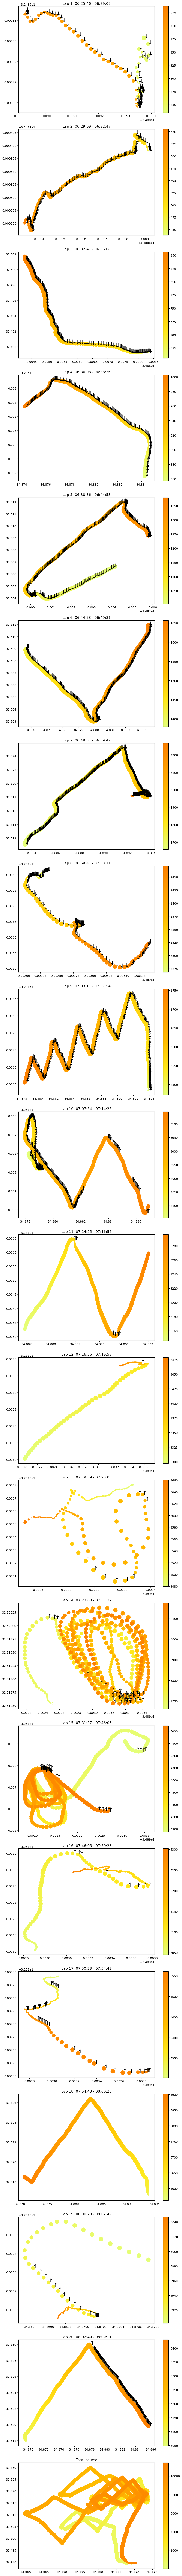

In [ ]:
# Plots every lap
def plot_location_and_speed(df):
    fig, axs = plt.subplots(len(smartwatch_dataset) - 1 , 1, figsize=(9, 120))
    min_time = datetime.datetime.strptime(df['time'].min(), '%Y-%m-%d %H:%M:%S.%f')
    lap_time = pd.to_datetime(smartwatch_dataset['Cumulative Time'])
    surfers_time = pd.to_datetime(location_datasets[0]['time']).dt.time

    # Please find a different solution
    zero_time = datetime.datetime.strptime('00:00:00', '%H:%M:%S')

    for i in range(len(smartwatch_dataset) - 2):
        start_time = (min_time - zero_time + lap_time[i]).time()
        end_time = (min_time - zero_time + lap_time[i+1]).time()
        df_with_idx = df.loc[(surfers_time > start_time) & (surfers_time <= end_time)]
        velocities = df_with_idx['SOG - Speed over Ground']
        #Min max normalization to keep all speeds positive (we need them just for scaling)
        velocities = 200*(velocities-velocities.min())/(velocities.max()-velocities.min())
        im = axs[i].scatter(x=df_with_idx['longitude'],
                            y=df_with_idx['latitude'],
                            s=velocities,
                            c=df_with_idx.index,
                            cmap=plt.cm.get_cmap('Wistia'))
        axs[i].set_title(f'Lap {i+1}: {start_time.replace(microsecond=0)} - {end_time.replace(microsecond=0)}')
        df_with_idx = df_with_idx.reset_index()
        for k, txt in enumerate(df_with_idx['Heel Segment']):
            if txt == 'upwind':
                axs[i].annotate('↑', (df_with_idx['longitude'][k], df_with_idx['latitude'][k]),fontsize=18)
            if txt == 'downwind':
                axs[i].annotate('↓', (df_with_idx['longitude'][k], df_with_idx['latitude'][k]),fontsize=18)
        fig.colorbar(im, ax=axs[i])
    s = df['SOG - Speed over Ground']
    s = 200 * ((s-s.min())/(s.max()-s.min()))
    im = axs[len(axs)-1].scatter(x=df['longitude'],
                            y=df['latitude'],
                            s=s.values,
                            c=df.index,
                            cmap=plt.cm.get_cmap('Wistia'))
    fig.colorbar(im, ax=axs[len(axs)-1])
    axs[len(axs)-1].set_title("Total course")
    plt.tight_layout()
    plt.show()

plot_location_and_speed(location_datasets[0])

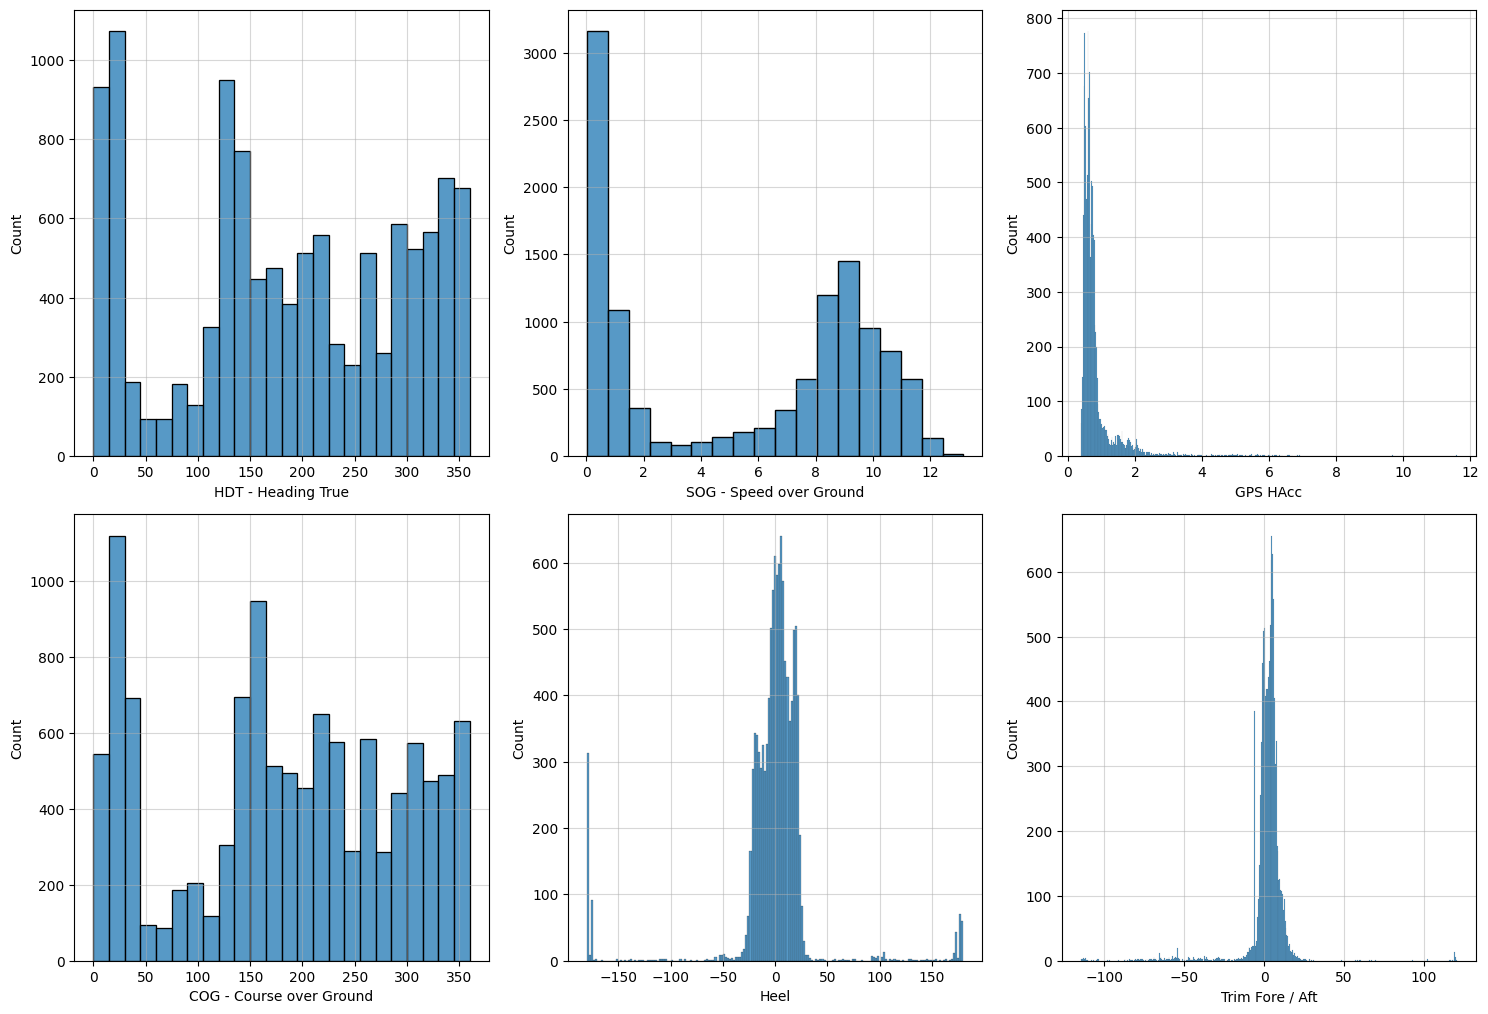

In [ ]:
target = 'windspeed'
cols = ['HDT - Heading True', 'SOG - Speed over Ground',  'GPS HAcc',
        'COG - Course over Ground', 'Heel', 'Trim Fore / Aft']

plt.figure(figsize=(15, 5 * len(cols)))
for i, column in enumerate(cols):
    plt.subplot(len(cols),3,i+1)
    #define hue for heel-wind_direction
    sns.histplot(data=location_datasets[0], x=column)
    plt.grid(alpha=0.5)
plt.tight_layout()